#load_breast_cancer

##Preprocess

In [ ]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
X = cancer.data
Y = cancer.target
X.shape, Y.shape

((569, 30), (569,))

In [ ]:
from sklearn.model_selection import train_test_split
x_train_all, x_test, y_train_all, y_test = train_test_split(X, Y, test_size=0.2)
x_train,x_val,y_train,y_val = train_test_split(x_train_all, y_train_all, test_size=0.2)


## compared Scaling

['mean perimeter' 'mean area' 'mean smoothness']


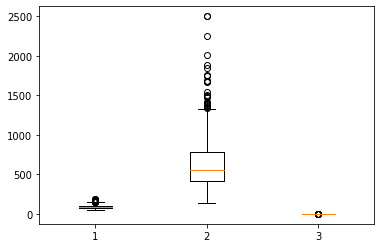

In [ ]:
import matplotlib.pyplot as plt
print(cancer.feature_names[[2,3,4]])
plt.boxplot(X[:,2:5])
plt.show()

In [ ]:
import numpy as np
np.bincount(Y)

array([212, 357])

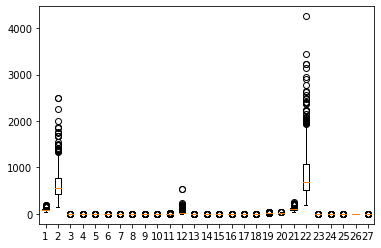

In [ ]:
plt.boxplot(X[:,2:-1])
plt.show()

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_StandardScaler = scaler.fit_transform(X)

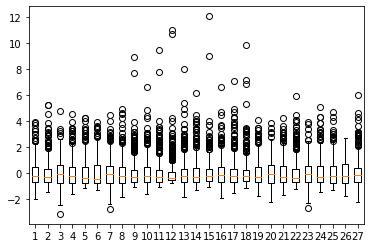

In [ ]:
import matplotlib.pyplot as plt
plt.boxplot(X_StandardScaler[:,2:-1])
plt.show()

##Normal

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers
model = tf.keras.models.Sequential([
  layers.Input(30),          # input node size
  layers.Dense(20, activation='sigmoid'),
  # layers.Dense(128, activation='sigmoid'),
  layers.Dense(1, activation='sigmoid')  # output node size
])
model.compile(optimizer=tf.keras.optimizers.SGD(lr=0.01),
              loss='binary_crossentropy',
              metrics=['accuracy'])
hist = model.fit(x_train, y_train, epochs=50, batch_size=256, validation_split=0.3, verbose=1, validation_data=(x_val, y_val))

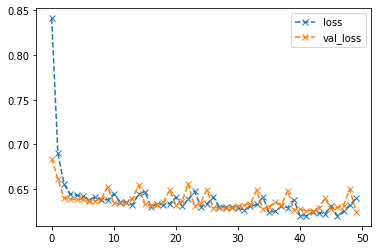

In [ ]:
import matplotlib.pyplot as plt
plt.plot(hist.history['loss'], 'x--', label='loss')
plt.plot(hist.history['val_loss'], 'x--', label='val_loss')
# plt.plot(hist.history['accuracy'], 'x-', label='accuracy')
# plt.plot(hist.history['val_accuracy'], 'x-', label='val_accuracy')
plt.legend()

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 20)                620       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 21        
Total params: 641
Trainable params: 641
Non-trainable params: 0
_________________________________________________________________


##StandardScaler

In [ ]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
X = cancer.data
Y = cancer.target
# X.shape, Y.shape

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)


In [ ]:
import tensorflow as tf
from tensorflow.keras import layers

model = tf.keras.models.Sequential([
  layers.Input(30),          # input node size
  layers.Dense(20, activation='sigmoid'),
  # layers.Dense(128, activation='sigmoid'),
  layers.Dense(1, activation='sigmoid')  # output node size
])
model.compile(optimizer=tf.keras.optimizers.SGD(lr=0.01),
              loss='binary_crossentropy',
              metrics=['accuracy'])
hist = model.fit(x_train, y_train, epochs=50, batch_size=256, validation_split=0.3, verbose=0)

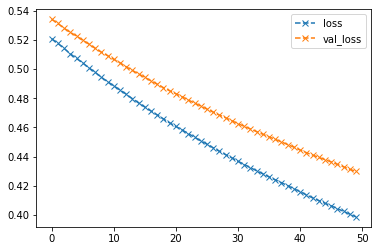

In [ ]:
import matplotlib.pyplot as plt
plt.plot(hist.history['loss'], 'x--', label='loss')
plt.plot(hist.history['val_loss'], 'x--', label='val_loss')
# plt.plot(hist.history['accuracy'], 'x-', label='accuracy')
# plt.plot(hist.history['val_accuracy'], 'x-', label='val_accuracy')
plt.legend()

##warning predict with standard scaling data

In [ ]:
# scaler = StandardScaler()
# x_test = scaler.transform(x_test)
# pred = model.predict(x_test)

##Normalizing

In [ ]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
X = cancer.data
Y = cancer.target
# X.shape, Y.shape

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers

regular = 0.00001

model = tf.keras.models.Sequential([
  layers.Input(30),          # input node size
  layers.Dense(20, activation='sigmoid',
    kernel_regularizer=tf.keras.regularizers.l2(regular),
    activity_regularizer=tf.keras.regularizers.l2(regular)),
  layers.Dense(1, activation='sigmoid')  # output node size
])

model.compile(optimizer=tf.keras.optimizers.SGD(lr=0.01),
              loss='binary_crossentropy',
              metrics=['accuracy'])
hist = model.fit(x_train, y_train, epochs=50, batch_size=256, validation_split=0.3, verbose=0)

In [ ]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 20)                620       
_________________________________________________________________
dense_13 (Dense)             (None, 1)                 21        
Total params: 641
Trainable params: 641
Non-trainable params: 0
_________________________________________________________________


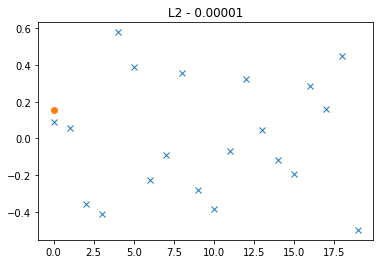

In [ ]:
weights, biases = model.layers[1].get_weights()
weights.shape, biases.shape
import matplotlib.pyplot as plt
plt.plot(weights, 'x')
plt.plot(biases, 'o')
plt.title('L2 - 0.00001')
plt.show()


In [ ]:
type(weights), len(weights)

(numpy.ndarray, 20)

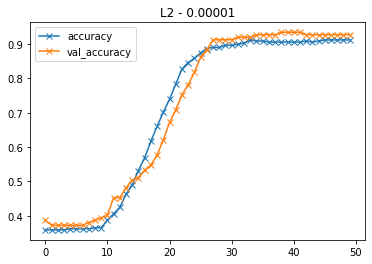

In [ ]:
import matplotlib.pyplot as plt
# plt.figure(figsize=(20,20))
# plt.plot(hist.history['loss'], 'x--', label='loss')
# plt.plot(hist.history['val_loss'], 'x--', label='val_loss')
plt.plot(hist.history['accuracy'], 'x-', label='accuracy')
plt.plot(hist.history['val_accuracy'], 'x-', label='val_accuracy')
plt.title('L2 - 0.00001')
plt.legend()

# batch size

In [ ]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
X = cancer.data
Y = cancer.target
# X.shape, Y.shape

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers

model = tf.keras.models.Sequential([
  layers.Input(30),          # input node size
  layers.Dense(20, activation='sigmoid'),
  # layers.Dense(128, activation='sigmoid'),
  layers.Dense(1, activation='sigmoid')  # output node size
])
model.compile(optimizer=tf.keras.optimizers.SGD(lr=0.01),
              loss='binary_crossentropy',
              metrics=['accuracy'])
hist = model.fit(x_train, y_train, epochs=50, batch_size=516, validation_split=0.3, verbose=0)

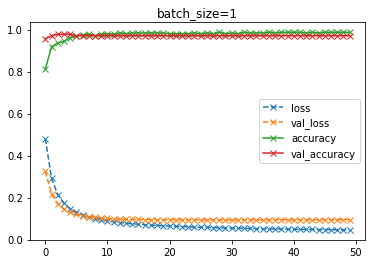

In [ ]:
import matplotlib.pyplot as plt
plt.plot(hist.history['loss'], 'x--', label='loss')
plt.plot(hist.history['val_loss'], 'x--', label='val_loss')
plt.plot(hist.history['accuracy'], 'x-', label='accuracy')
plt.plot(hist.history['val_accuracy'], 'x-', label='val_accuracy')
plt.title('batch_size=1')
plt.legend()

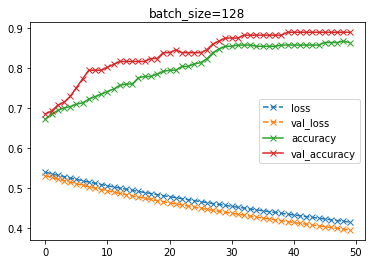

In [ ]:
import matplotlib.pyplot as plt
plt.plot(hist.history['loss'], 'x--', label='loss')
plt.plot(hist.history['val_loss'], 'x--', label='val_loss')
plt.plot(hist.history['accuracy'], 'x-', label='accuracy')
plt.plot(hist.history['val_accuracy'], 'x-', label='val_accuracy')
plt.title('batch_size=128')
plt.legend()

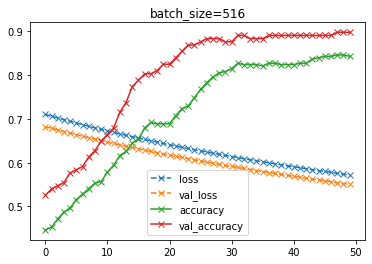

In [ ]:
import matplotlib.pyplot as plt
plt.plot(hist.history['loss'], 'x--', label='loss')
plt.plot(hist.history['val_loss'], 'x--', label='val_loss')
plt.plot(hist.history['accuracy'], 'x-', label='accuracy')
plt.plot(hist.history['val_accuracy'], 'x-', label='val_accuracy')
plt.title('batch_size=516')
plt.legend()

In [1]:
import tensorflow as tf
from tensorflow.keras import layers

regular = 0.00001

model = tf.keras.models.Sequential([
  layers.Input(30),          # input node size
  layers.Dense(20, activation='sigmoid',
    kernel_regularizer=tf.keras.regularizers.l2(regular),
    activity_regularizer=tf.keras.regularizers.l2(regular)),
  layers.Dense(1, activation='sigmoid')  # output node size
])

model.compile(optimizer=tf.keras.optimizers.SGD(lr=0.01),
              loss='binary_crossentropy',
              metrics=['accuracy'])
hist = model.fit(x_train, y_train, epochs=50, batch_size=516, validation_split=0.3, verbose=0)

NameError: ignored

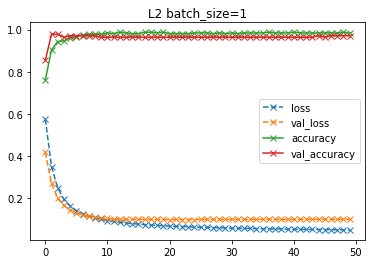

In [ ]:
import matplotlib.pyplot as plt
plt.plot(hist.history['loss'], 'x--', label='loss')
plt.plot(hist.history['val_loss'], 'x--', label='val_loss')
plt.plot(hist.history['accuracy'], 'x-', label='accuracy')
plt.plot(hist.history['val_accuracy'], 'x-', label='val_accuracy')
plt.title('L2 batch_size=1')
plt.legend()

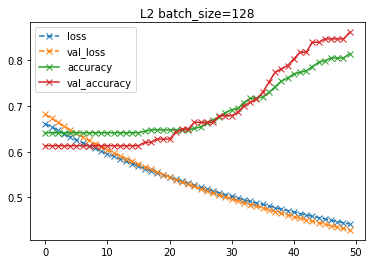

In [ ]:
import matplotlib.pyplot as plt
plt.plot(hist.history['loss'], 'x--', label='loss')
plt.plot(hist.history['val_loss'], 'x--', label='val_loss')
plt.plot(hist.history['accuracy'], 'x-', label='accuracy')
plt.plot(hist.history['val_accuracy'], 'x-', label='val_accuracy')
plt.title('L2 batch_size=128')
plt.legend()

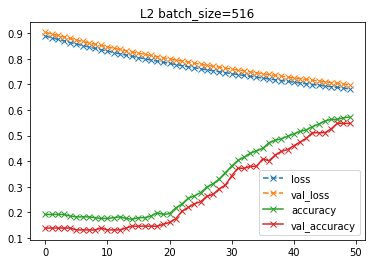

In [ ]:
import matplotlib.pyplot as plt
plt.plot(hist.history['loss'], 'x--', label='loss')
plt.plot(hist.history['val_loss'], 'x--', label='val_loss')
plt.plot(hist.history['accuracy'], 'x-', label='accuracy')
plt.plot(hist.history['val_accuracy'], 'x-', label='val_accuracy')
plt.title('L2 batch_size=516')
plt.legend()